In [2]:
import pandas as pd
import numpy as np
import spacy

from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Functions:

In [3]:
# Function For Text Normalization
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

# NLP Functions
nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]


Load Dataset:

In [4]:
validation_set = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_validation_set.csv')
validation_set = validation_set.replace(np.nan, '')
validation_set.head()

,screen_name,name,description,statuses_count,recent_100_tweets,friends_count,recent_100_friends_nd,followers_count,default_profile_image,favourites_count,parliament_member,friends_politician_count_1000,followers_politician_count_1000,mentions_politician_count
0,papakostakater,ΚΑΤΕΡΙΝΑ ΠΑΠΑΚΩΣΤΑ - ΠΑΛΙΟΥΡΑ,Δικηγόρος ~ \nΒουλευτής Νέας Δημοκρατίας Νομού...,77,RT @MarkopoulosChTh: The ReMARKables: Η Βουλε...,202,Markopoulos_Ch_Th | BA Communication Speciali...,159,False,94,1,98,13.0,0
1,raptizoi,Ζωή Ράπτη,"Υφυπουργός Υγείας, Bουλευτής Β1 Βορείου Τομέα ...",1891,RT @MegaTvOfficial: Πολιτική αντιπαράθεση για...,861,"Kamala Harris Fighting for the people. Wife, ...",2667,False,4252,1,251,4.0,50
2,nkerameus,Niki Kerameus,"Υπουργός Παιδείας και Θρησκευμάτων, Βουλευτής ...",5135,Ένα είναι το μήνυμα της σημερινής ημέρας προς...,714,European Commission 🇪🇺 News and information f...,40000,False,2809,1,202,0.0,32
3,AndreasPoulas,Ανδρέας Πουλάς,Βουλευτής Ν. Αργολίδας - ΚΙΝΗΜΑ ΑΛΛΑΓΗΣ,326,RT @amna_news: .@AndreasPoulas (#ΚΙΝΑΛ): «Πολ...,99,Aggelos Gavris Αρχισυντάκτης / ιδιοκτήτης @Th...,389,False,200,1,43,9.0,22
4,Dora_Bakoyannis,Ντόρα Μπακογιάννη,To λογαριασμό συνήθως χειρίζεται συνεργάτης μο...,13916,Συνέντευξη Ντόρας Μπακογιάννη στον @SkaitvGR ...,6825,Michael Bertakis 36 years old Work Provisions...,155118,False,3184,1,103,0.0,6


In [4]:
# Variable to Hold predicted labels 
predictions = pd.DataFrame()
predictions['screen_name'] = validation_set['screen_name']
predictions['true_label'] = validation_set['parliament_member']

# Case 1: Lower threshold
---

In [5]:
def get_text_data_nd(df):
    df['textdata'] = clean_text(df['name'] + ' ' + df['description'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    
    return df.textdata

# Load the model
model_nd = joblib.load('../classifiers/classifier_politician_nd.sav')


predicted_proba = model_nd.predict_proba(validation_set)

In [6]:
def get_labels(predicted_proba, threshold):
    labels = []
    for proba in predicted_proba[:,1]:
        if proba > threshold:
            labels.append(1)
        else:
            labels.append(0)
    return labels


labels_50 = get_labels(predicted_proba,0.50)
labels_49 = get_labels(predicted_proba,0.49)
labels_48 = get_labels(predicted_proba,0.48)
labels_46 = get_labels(predicted_proba,0.46)

In [19]:
from sklearn.metrics import precision_score, recall_score

y_true = validation_set.parliament_member

y_pred = labels_50
prec_50, rec_50 = precision_score(y_true, y_pred, pos_label=1).round(2), recall_score(y_true, y_pred, pos_label=1).round(2)

y_pred = labels_49
prec_49, rec_49 = precision_score(y_true, y_pred, pos_label=1).round(2), recall_score(y_true, y_pred, pos_label=1).round(2)

y_pred = labels_48
prec_48, rec_48 = precision_score(y_true, y_pred, pos_label=1).round(2), recall_score(y_true, y_pred, pos_label=1).round(2)

y_pred = labels_46
prec_46, rec_46 = precision_score(y_true, y_pred, pos_label=1, zero_division=1).round(2), recall_score(y_true, y_pred, pos_label=1).round(2)



y_pred = labels_50
prec_50_others, rec_50_others = precision_score(y_true, y_pred, pos_label=0).round(2), recall_score(y_true, y_pred, pos_label=0).round(2)

y_pred = labels_49
prec_49_others, rec_49_others = precision_score(y_true, y_pred, pos_label=0).round(2), recall_score(y_true, y_pred, pos_label=0).round(2)

y_pred = labels_48
prec_48_others, rec_48_others = precision_score(y_true, y_pred, pos_label=0).round(2), recall_score(y_true, y_pred, pos_label=0).round(2)

y_pred = labels_46
prec_46_others, rec_46_others = precision_score(y_true, y_pred, pos_label=0, zero_division=1).round(2), recall_score(y_true, y_pred, pos_label=0).round(2)

---- Metrics for Class Others ----
Threshold= 0.50 --> Precision= 0.86, Recall=0.98
Threshold= 0.49 --> Precision= 0.89, Recall=0.94
Threshold= 0.48 --> Precision= 0.96, Recall=0.44
Threshold= 0.46 --> Precision= 1.0, Recall=0.0


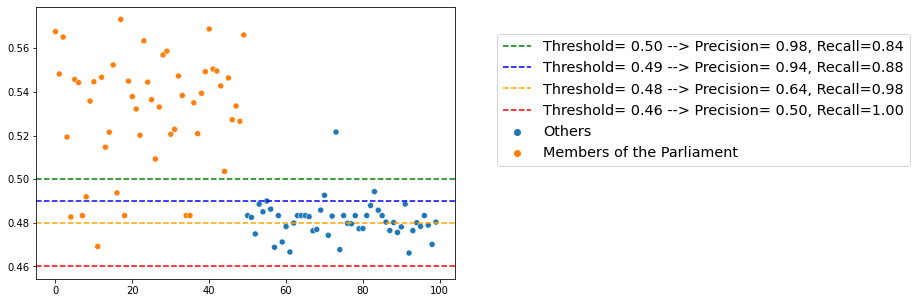

In [20]:
fig, ax = plt.subplots(figsize=[7.5,5])
plot = sns.scatterplot(x=validation_set.index, y = predicted_proba[:,1], hue=validation_set.parliament_member)
plot.axhline(0.5, ls='--', c='green', label='1')
plot.axhline(0.49, ls='--', c='blue', label='2')
plot.axhline(0.48, ls='--', c='orange', label='3')
plot.axhline(0.46, ls='--', c = 'red', label='4')

labels = [f'Threshold= 0.50 --> Precision= {prec_50}, Recall={rec_50}',
          f'Threshold= 0.49 --> Precision= {prec_49}, Recall={rec_49}', 
          f'Threshold= 0.48 --> Precision= {prec_48}, Recall={rec_48}', 
          f'Threshold= 0.46 --> Precision= {prec_46}0, Recall={rec_46}0',
          "Others", 
          "Members of the Parliament"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels, bbox_to_anchor=(1.1,0.90), loc=2, borderaxespad=0., fontsize='x-large')

print('---- Metrics for Class Others ----')
print(f'Threshold= 0.50 --> Precision= {prec_50_others}, Recall={rec_50_others}')
print(f'Threshold= 0.49 --> Precision= {prec_49_others}, Recall={rec_49_others}')
print(f'Threshold= 0.48 --> Precision= {prec_48_others}, Recall={rec_48_others}')
print(f'Threshold= 0.46 --> Precision= {prec_46_others}, Recall={rec_46_others}')

# Train using class weights

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import json
import tweepy
import time

from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import joblib

from sklearn.metrics import precision_score, recall_score

# Function For Text Normalization
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]

In [6]:
# Read Training Set
training_set = pd.read_csv('../../../../datasets/Greek Politicians/classification/parliament_members_training_set.csv', 
                           usecols=['screen_name', 'name', 'description', 'parliament_member'])
training_set = training_set.replace(np.nan, '')

In [7]:
def get_text_data_parl_nd(df):
    df = df.copy()
    df['textdata'] = clean_text(df['name'] + ' ' + df['description'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    
    return df.textdata


get_text = FunctionTransformer(get_text_data_parl_nd)

In [8]:
weights = np.linspace(0.01, 1, 100)
weights = [weight.round(4) for weight in weights]
params = [{0:x, 1:(1.0-x).round(4)} for x in weights]

X = training_set
y = training_set['parliament_member']

def score_fun_rec(estimator, X_test, y_true):
    y_pred = estimator.predict(X_test)
    return recall_score(y_true, y_pred, pos_label=1, zero_division=1)
                        
def score_fun_pre(estimator, X_test, y_true):
    y_pred = estimator.predict(X_test)
    return precision_score(y_true, y_pred, pos_label=1, zero_division=1) 

precisions = []
recalls = []
ws = []
for param in tqdm(params):
    pipeline = Pipeline([
        ('selector', get_text),
        ('tfidf', TfidfVectorizer(max_df=0.5, max_features=2000, min_df=1)),
        ('lr', LogisticRegression(max_iter=1000, C=0.1, penalty = 'l2', class_weight=param))
        ])
    cv_score= cross_validate(pipeline, X, y, cv=3, scoring={'recall':score_fun_rec, 'precision':score_fun_pre})
    prec = cv_score['test_precision'].mean().round(4)
    reca = cv_score['test_recall'].mean().round(4)
    
    precisions.append(prec)
    recalls.append(reca)
    ws.append(param[1])
    print((prec,reca, param))

  0%|          | 0/100 [00:00<?, ?it/s]

(0.5, 1.0, {0: 0.01, 1: 0.99})
(0.5, 1.0, {0: 0.02, 1: 0.98})
(0.5, 1.0, {0: 0.03, 1: 0.97})
(0.5, 1.0, {0: 0.04, 1: 0.96})
(0.5, 1.0, {0: 0.05, 1: 0.95})
(0.5, 1.0, {0: 0.06, 1: 0.94})
(0.5, 1.0, {0: 0.07, 1: 0.93})
(0.5, 1.0, {0: 0.08, 1: 0.92})
(0.5, 1.0, {0: 0.09, 1: 0.91})
(0.5, 1.0, {0: 0.1, 1: 0.9})
(0.5, 1.0, {0: 0.11, 1: 0.89})
(0.5, 1.0, {0: 0.12, 1: 0.88})
(0.5, 1.0, {0: 0.13, 1: 0.87})
(0.5, 1.0, {0: 0.14, 1: 0.86})
(0.5, 1.0, {0: 0.15, 1: 0.85})
(0.5, 1.0, {0: 0.16, 1: 0.84})
(0.5, 1.0, {0: 0.17, 1: 0.83})
(0.5, 1.0, {0: 0.18, 1: 0.82})
(0.5, 1.0, {0: 0.19, 1: 0.81})
(0.5, 1.0, {0: 0.2, 1: 0.8})
(0.5, 1.0, {0: 0.21, 1: 0.79})
(0.5, 1.0, {0: 0.22, 1: 0.78})
(0.5, 1.0, {0: 0.23, 1: 0.77})
(0.5, 1.0, {0: 0.24, 1: 0.76})
(0.5, 1.0, {0: 0.25, 1: 0.75})
(0.5, 1.0, {0: 0.26, 1: 0.74})
(0.5, 1.0, {0: 0.27, 1: 0.73})
(0.5, 1.0, {0: 0.28, 1: 0.72})
(0.5, 1.0, {0: 0.29, 1: 0.71})
(0.5, 1.0, {0: 0.3, 1: 0.7})
(0.5, 1.0, {0: 0.31, 1: 0.69})
(0.5, 1.0, {0: 0.32, 1: 0.68})
(0.5, 1.0, {0:

<AxesSubplot:>

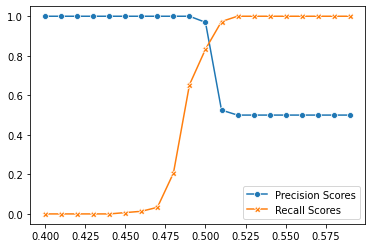

In [11]:
sns.lineplot(x=ws[40:60], y=precisions[40:60], marker = 'o', label='Precision Scores')
sns.lineplot(x=ws[40:60], y=recalls[40:60], marker = 'X', label='Recall Scores')

In [32]:
pipeline = Pipeline([
        ('selector', get_text),
        ('tfidf', TfidfVectorizer(max_df=0.5, max_features=2000, min_df=1)),
        ('lr', LogisticRegression(max_iter=1000, C=0.1, penalty = 'l2', class_weight={0:1-0.51, 1:0.51}))
        ]).fit(X,y)

In [33]:
y_pred = pipeline.predict(validation_set)

                       precision    recall  f1-score   support

Not-Parliament-Member       0.96      0.52      0.68        50
    Parliament-Member       0.67      0.98      0.80        50

             accuracy                           0.75       100
            macro avg       0.82      0.75      0.74       100
         weighted avg       0.82      0.75      0.74       100



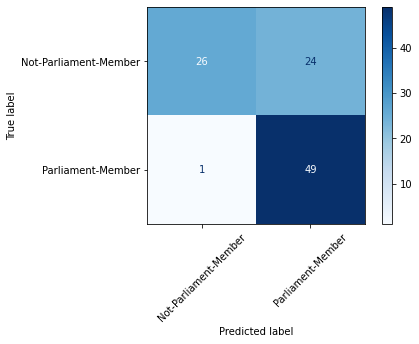

In [34]:
target_names = ['Not-Parliament-Member', 'Parliament-Member']
predicted_labels = pipeline.predict(validation_set)
print(classification_report(y_true = validation_set.parliament_member, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(pipeline, validation_set, validation_set.parliament_member, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)